# Introduction
평균수익률을 알면 호가창에 의존할 필요 없이 평균수익률에 여유롭게 매도할 수 있다.  
마찬가지로 평균 매도시간을 알면 호가창에 의존할 필요 없이 평균 매도시간에 여유롭게 매도할 수 있다.  
유튜브: https://youtu.be/pQwenN8D6mc

# Import

In [29]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

# Load

In [30]:
df = pd.read_csv('data.csv')
df.head()

,주문일자,체결시간,종목명,매수가,수익률,매매기법,매도시간,종목코드,매수등락률,고가등락률,시가등락률,뉴스기사,10이격도,20이격도,최대거래대금(억),최소거래대금(억)
0,2022-03-29,09:09:07,고려시멘트,5230,2.87,NaN,09:21:27,198440,16.22,24.44,6.22,1,4.38,9.72,113,25
1,2022-03-29,09:28:09,고려시멘트,5410,1.85,NaN,09:32:19,198440,20.22,24.44,6.22,1,0.93,1.72,113,16
2,2022-03-29,10:38:18,고려시멘트,5441,0.15,NaN,10:51:17,198440,20.91,24.44,6.22,1,0.35,0.09,113,2
3,2022-03-29,09:51:11,영진약품,5490,0.66,NaN,09:55:24,3520,6.60,10.10,0.19,1,1.57,1.94,62,0
4,2022-03-29,09:58:16,버킷스튜디오,5060,-0.59,NaN,09:59:56,66410,11.58,18.85,3.09,1,0.87,2.06,72,3


# Preprocessing

In [31]:
df = df[df['뉴스기사'] == 1]
df = df[df['매수등락률'] > 12]
df = df[df['최대거래대금(억)'] > 60]
df = df[df['매매기법'] != '상따']

In [32]:
df['체결시간'] = pd.to_datetime(df['체결시간']).apply(lambda x : x.replace(second=00))
df['매도시간'] = pd.to_datetime(df['매도시간']).apply(lambda x : x.replace(second=00))

In [33]:
df['시차'] = df['매도시간'] - df['체결시간']

In [57]:
df['시차'] = df['시차'].apply(lambda x : x.total_seconds() / 60)

In [62]:
df.head()

,주문일자,체결시간,종목명,매수가,수익률,매매기법,매도시간,종목코드,매수등락률,고가등락률,시가등락률,뉴스기사,10이격도,20이격도,최대거래대금(억),최소거래대금(억),시차
0,2022-03-29,2022-04-18 09:09:00,고려시멘트,5230,2.87,NaN,2022-04-18 09:21:00,198440,16.22,24.44,6.22,1,4.38,9.72,113,25,12.0
1,2022-03-29,2022-04-18 09:28:00,고려시멘트,5410,1.85,NaN,2022-04-18 09:32:00,198440,20.22,24.44,6.22,1,0.93,1.72,113,16,4.0
2,2022-03-29,2022-04-18 10:38:00,고려시멘트,5441,0.15,NaN,2022-04-18 10:51:00,198440,20.91,24.44,6.22,1,0.35,0.09,113,2,13.0
5,2022-03-29,2022-04-18 10:08:00,버킷스튜디오,5150,2.14,NaN,2022-04-18 10:22:00,66410,13.56,18.85,3.09,1,1.29,2.10,72,3,14.0
6,2022-03-29,2022-04-18 10:31:00,버킷스튜디오,5260,-1.33,NaN,2022-04-18 10:32:00,66410,15.99,18.85,3.09,1,1.52,0.38,87,3,1.0


# Visualization
대부분 5분 안에 매도가 이뤄진다.

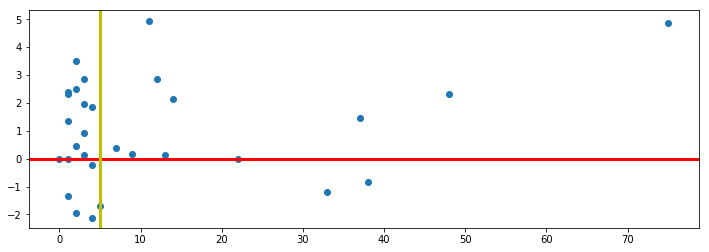

In [65]:
plt.scatter(df['시차'], df['수익률'])
plt.axhline(y=0, color='r', linewidth=3)
plt.axvline(x=5, color='y', linewidth=3)
plt.rcParams["figure.figsize"] = (12, 4)
plt.show()

# Conclusion
대부분 5분 안에 매도가 일어난다. 길게 끌고 가도 수익률이 높아지지는 않는다.